<a href="https://colab.research.google.com/github/TheLegendVilva/ModelProjects/blob/main/MisaHubResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifying Bleeding and Non-Bleeding Using Resnet**

## **Importing and Splitting**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/WCEBleedGen.zip'
!unzip $zip_path -d MISAHUB

In [ ]:
import os
import shutil

images_folder = '/content/MISAHUB/WCEBleedGen/bleeding/Images'
annotations_folder = '/content/MISAHUB/WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT'
output_folder = '/content/MISAHUB/train/'

# Create the 'train' folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create 'images' and 'labels' folders inside 'train'
images_output_folder = os.path.join(output_folder, 'images')
labels_output_folder = os.path.join(output_folder, 'labels')

os.makedirs(images_output_folder, exist_ok=True)
os.makedirs(labels_output_folder, exist_ok=True)

# Get a list of files in both folders
image_files = os.listdir(images_folder)
annotation_files = os.listdir(annotations_folder)

# Ensure only files with the same base name are considered
image_files = [file for file in image_files if file.endswith('.png')]
annotation_files = [file for file in annotation_files if file.endswith('.txt')]

# Sort the files to ensure consistent numbering
image_files.sort()
annotation_files.sort()

# Rename and move the files to the 'train' folder
for i, (image_file, annotation_file) in enumerate(zip(image_files, annotation_files), start=1):
    # Define the new names for the image and annotation
    new_image_name = f"image_{i}.png"
    new_annotation_name = f"image_{i}.txt"

    # Rename and move the image file
    old_image_path = os.path.join(images_folder, image_file)
    new_image_path = os.path.join(images_output_folder, new_image_name)
    os.rename(old_image_path, new_image_path)

    # Rename and move the annotation file
    old_annotation_path = os.path.join(annotations_folder, annotation_file)
    new_annotation_path = os.path.join(labels_output_folder, new_annotation_name)
    os.rename(old_annotation_path, new_annotation_path)

    print(f"Renamed and moved: {image_file} to {new_image_name}")
    print(f"Renamed and moved: {annotation_file} to {new_annotation_name}")

print("All files have been renamed and moved to the 'train' folder.")


In [ ]:
import os
import shutil

images_folder = '/content/MISAHUB/WCEBleedGen/non-bleeding/images'
output_folder = '/content/MISAHUB/train/'

# Create the 'train' folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create 'images' and 'labels' folders inside 'train'
images_output_folder = os.path.join(output_folder, 'images')
labels_output_folder = os.path.join(output_folder, 'labels')

os.makedirs(images_output_folder, exist_ok=True)
os.makedirs(labels_output_folder, exist_ok=True)

# Get a list of files in the 'images' folder
image_files = os.listdir(images_folder)
image_files = [file for file in image_files if file.endswith('.png')]
image_files.sort()

# Rename and move the files to the 'train' folder
for i, image_file in enumerate(image_files, start=1310):
    # Define the new names for the image and annotation
    new_image_name = f"images_{i}.png"
    new_annotation_name = f"images_{i}.txt"

    # Rename and move the image file
    old_image_path = os.path.join(images_folder, image_file)
    new_image_path = os.path.join(images_output_folder, new_image_name)
    os.rename(old_image_path, new_image_path)

    # Create an empty label file in the 'labels' folder
    new_annotation_path = os.path.join(labels_output_folder, new_annotation_name)
    with open(new_annotation_path, 'w') as empty_file:
        pass

    print(f"Renamed and moved: {image_file} to {new_image_name}")
    print(f"Created empty label file: {new_annotation_name}")

print("All files have been renamed and moved to the 'train' folder.")

In [ ]:
import os
import shutil

# Define the paths to the 'train' directory and its subdirectories
train_dir = 'MISAHUB/train'  # Update this with the actual path to your 'train' directory
images_dir = os.path.join(train_dir, 'images')
labels_dir = os.path.join(train_dir, 'labels')
train_dir = 'MISAHUB/newTrain'
# Create output directories for the two classes
bleeding_dir = os.path.join(train_dir, 'bleeding')
non_bleeding_dir = os.path.join(train_dir, 'non_bleeding')

# Create the 'bleeding' and 'non_bleeding' directories if they don't exist
os.makedirs(bleeding_dir, exist_ok=True)
os.makedirs(non_bleeding_dir, exist_ok=True)

# Iterate through the files in the 'images' directory
for image_filename in os.listdir(images_dir):
    # Form the corresponding label file path
    label_filename = os.path.splitext(image_filename)[0] + '.txt'
    label_filepath = os.path.join(labels_dir, label_filename)

    # Check if the label file is empty (indicating non-bleeding)
    if os.path.exists(label_filepath) and os.path.getsize(label_filepath) == 0:
        # Move the image to the 'non_bleeding' directory
        shutil.move(os.path.join(images_dir, image_filename), os.path.join(non_bleeding_dir, image_filename))
    else:
        # Move the image to the 'bleeding' directory
        shutil.move(os.path.join(images_dir, image_filename), os.path.join(bleeding_dir, image_filename))

print("Dataset organized into 'bleeding' and 'non_bleeding' classes.")


Dataset organized into 'bleeding' and 'non_bleeding' classes.


In [ ]:
! ls MISAHUB/newTrain/bleeding | wc -l

1309


In [ ]:
import os
import random
import shutil

# Define the paths to the 'bleeding' and 'non_bleeding' directories
bleeding_dir = '/content/MISAHUB/newTrain/bleeding'  # Update with the actual path to your 'bleeding' directory
non_bleeding_dir = '/content/MISAHUB/newTrain/non_bleeding'  # Update with the actual path to your 'non-bleeding' directory

# Define the path to the 'test' directory
test_dir = '/content/MISAHUB/test'  # Update with the path where you want to create the 'test' directory

# Create the 'test' directory if it doesn't exist
os.makedirs(test_dir, exist_ok=True)

# Define the number of files to randomly select from each directory
num_files_to_select = 20

# Randomly select 20 files from the 'bleeding' directory
bleeding_files = os.listdir(bleeding_dir)
selected_bleeding_files = random.sample(bleeding_files, num_files_to_select)

# Randomly select 20 files from the 'non_bleeding' directory
non_bleeding_files = os.listdir(non_bleeding_dir)
selected_non_bleeding_files = random.sample(non_bleeding_files, num_files_to_select)

# Copy the selected 'bleeding' files to the 'test' directory with new names
for filename in selected_bleeding_files:
    source_filepath = os.path.join(bleeding_dir, filename)
    new_filename = f'bleeding_{filename}'
    dest_filepath = os.path.join(test_dir, new_filename)
    shutil.copy(source_filepath, dest_filepath)
    # Remove the file from the 'bleeding' directory
    os.remove(source_filepath)

# Copy the selected 'non_bleeding' files to the 'test' directory with new names
for filename in selected_non_bleeding_files:
    source_filepath = os.path.join(non_bleeding_dir, filename)
    new_filename = f'non_bleeding_{filename}'
    dest_filepath = os.path.join(test_dir, new_filename)
    shutil.copy(source_filepath, dest_filepath)
    # Remove the file from the 'non_bleeding' directory
    os.remove(source_filepath)

print(f"Selected and copied {num_files_to_select} files from 'bleeding' and 'non-bleeding' to the 'test' directory, and removed them from the original directories.")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from pathlib import Path
dataset_dir = 'MISAHUB/newTrain'
dataset_dir = Path(dataset_dir)
bleeding = list(dataset_dir.glob('bleeding/*'))
print(bleeding[0])
image = PIL.Image.open(str(bleeding[0]))
width, height = image.size
print(width, height)

MISAHUB/newTrain/bleeding/image_1030.png
224 224


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the path to the 'train' directory
train_dir = 'MISAHUB/newTrain'
img_height,img_width=224,224
batch_size=32
train_dataset = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=32,  # Adjust batch size as needed
    image_size=(224, 224),  # Specify the desired image size
    shuffle=True,
    seed=123,
    validation_split=0.2,  # Split a portion of data for validation
    subset='training'  # Use 'training' subset for training data
)

# Create the validation dataset with the same validation split
validation_dataset = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=32,  # Adjust batch size as needed
    image_size=(224, 224),  # Specify the desired image size
    shuffle=True,
    seed=123,
    validation_split=0.2,  # Use the same validation split as for training
    subset='validation'  # Use 'validation' subset for validation data
)

Found 2578 files belonging to 2 classes.
Using 2063 files for training.
Found 2578 files belonging to 2 classes.
Using 515 files for validation.


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['bleeding', 'non_bleeding']


## **Classification ResNet**

In [ ]:
from tensorflow.keras.regularizers import l2
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',classes=2,
                   weights='imagenet')
# for layer in pretrained_model.layers:
#         layer.trainable=False
# Unfreeze specific layers
for layer in pretrained_model.layers:
    if layer.name in ['block4_conv1', 'block4_conv2', 'block4_conv3']:
        layer.trainable = True
    else:
        layer.trainable = False

# Compile the model after unfreezing layers
# resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.02)))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.02)))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 512)               0         
 apper)                                                          
                                                                 
 module_wrapper_3 (ModuleWr  (None, 1)                 513       
 apper)                                                 

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=5
history = resnet_model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

In [ ]:
import os

# Define the path to the 'test' directory
test_dir = 'MISAHUB/test'  # Update with the actual path to your 'test' directory

# Get a list of all image files in the 'test' directory
test_image_files = [os.path.join(test_dir, filename) for filename in os.listdir(test_dir)]

# Iterate through the 'test' images
for image_file in test_image_files:
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_file, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.expand_dims(img, axis=0)

    # Make predictions using the model
    predictions = resnet_model.predict(img)

    # Get the class label (assuming binary classification with 0 and 1)
    class_label = "bleeding" if predictions[0][0] < 0.5 else "non-bleeding"

    # Print the file name and predicted class
    print(f"File: {os.path.basename(image_file)}, Predicted Class: {class_label}")


## **Evaluating Model**

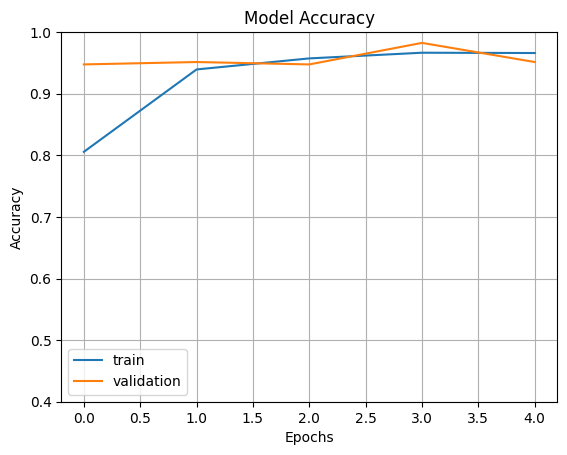

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## Saving the classifying Model:

In [ ]:
resnet_model.save("/content/drive/My Drive/models/resnet_model_MISAHUB")

# Detection on Bleeding Frames

In [ ]:
from tensorflow import keras
classifier = keras.models.load_model('/content/drive/My Drive/models/resnet_model_MISAHUB')

Now we will train the model for detection. For this we will use only the bleeding images and their annotations from the **MISAHUB/WCEBleedGen/bleeding** directory.</br>
images: "/content/MISAHUB/WCEBleedGen/bleeding/Images"</br>
bounding_boxes =  "/content/MISAHUB/WCEBleedGen/bleeding/Bounding\ boxes/XML"

In [ ]:
zip_path = '/content/drive/MyDrive/WCEBleedGen.zip'
!unzip $zip_path -d MISAHUB

In [16]:
%cd /content

/content


In [17]:
import os
import random
import shutil

# Define the paths to the source directories
images_dir = 'MISAHUB/WCEBleedGen/bleeding/Images'
yolo_dir = 'MISAHUB/WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT'

# Define the paths for train, validation, and test directories
train_dir = 'train_data'
val_dir = 'val_data'
test_dir = 'test_dir'

# Create the train, validation, and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


# Define subdirectories for "images" and "labels"
subdirs = ['images', 'labels']

# Create subdirectories for train, validation, and test datasets
for subdir in subdirs:
    os.makedirs(os.path.join(train_dir, subdir), exist_ok=True)
    os.makedirs(os.path.join(val_dir, subdir), exist_ok=True)
    os.makedirs(os.path.join(test_dir, subdir), exist_ok=True)


# List all the image files
image_files = os.listdir(images_dir)

# Shuffle the files randomly
random.shuffle(image_files)

# Calculate the split sizes
total_samples = len(image_files)
train_size = int(0.7 * total_samples)
val_size = int(0.295 * total_samples)
test_size = int(0.05* total_samples)


# Define a function to move image and XML files to the specified directory
def move_files(source_dir, destination_dir, subdir, file_list):
    for file_name in file_list:
        source_path = os.path.join(source_dir, file_name)
        destination_path = os.path.join(destination_dir, subdir, file_name)
        shutil.copy(source_path, destination_path)

# Move files to train directory
move_files(images_dir, train_dir, 'images', image_files[:train_size])
move_files(yolo_dir, train_dir, 'labels', [file.replace('.png', '.txt') for file in image_files[:train_size]])

# Move files to validation directory
move_files(images_dir, val_dir, 'images', image_files[train_size:train_size + val_size])
move_files(yolo_dir, val_dir, 'labels', [file.replace('.png', '.txt') for file in image_files[train_size:train_size + val_size]])


move_files(images_dir, test_dir, 'images', image_files[train_size:train_size + test_size])
move_files(yolo_dir, test_dir, 'labels', [file.replace('.png', '.txt') for file in image_files[train_size:train_size + test_size]])



## Yolov5


In [18]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [19]:
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.1+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [7]:
!touch data.yaml

In [20]:
%cd ..

/content


In [24]:
!mv train_data yolov5
!mv val_data yolov5
!mv test_dir yolov5

In [32]:
%cd /content/yolov5
!python train.py --epochs 50 --data data.yaml --weights ../yolov5s.pt --cache

/content/yolov5
train: weights=../yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=

In [36]:
!python detect.py --source test_dir/images --weights /content/yolov5/runs/train/exp4/weights/best.pt --save-txt

detect: weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], source=test_dir/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/65 /content/yolov5/test_dir/images/img- (1030).png: 640x640 1 bleeding, 11.5ms
image 2/65 /content/yolov5/test_dir/images/img- (107).png: 640x640 (no detections), 11.5ms
image 3/65 /content/yolov5/test_dir/images/img- (1075).png: 640x640 1 bleeding, 11.5ms
image 4/65 /content/yolov5/test_dir/images/img- (1081

In [37]:
import os
iou_values=[]
exp='exp5'
# Function to parse YOLO bounding box format
def parse_yolo_box(yolo_box_str):
    values = yolo_box_str.strip().split()
    class_id = int(values[0])
    x_center, y_center, width, height = map(float, values[1:])
    return class_id, x_center, y_center, width, height

# Function to calculate IoU
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    x_intersection = max(x1 - w1 / 2, x2 - w2 / 2)
    y_intersection = max(y1 - h1 / 2, y2 - h2 / 2)
    w_intersection = min(x1 + w1 / 2, x2 + w2 / 2) - x_intersection
    h_intersection = min(y1 + h1 / 2, y2 + h2 / 2) - y_intersection

    if w_intersection <= 0 or h_intersection <= 0:
        return 0.0

    area_intersection = w_intersection * h_intersection
    area_box1 = w1 * h1
    area_box2 = w2 * h2

    iou = area_intersection / (area_box1 + area_box2 - area_intersection)
    return iou

# Folder paths for predicted and ground truth label text files
predicted_folder = '/content/yolov5/runs/detect/'+exp+'/labels'
ground_truth_folder = '/content/yolov5/test_dir/labels'

# Iterate through files in the predicted folder
for filename in os.listdir(ground_truth_folder):
    if filename.endswith('.txt'):
        predicted_filepath = os.path.join(predicted_folder, filename)
        ground_truth_filepath = os.path.join(ground_truth_folder, filename)

        # Check if the corresponding ground truth file exists
        if not os.path.exists(predicted_filepath):
            print(f"No detections in {filename}")
            iou_values.append(0)
            continue

        with open(predicted_filepath, 'r') as predicted_file, open(ground_truth_filepath, 'r') as ground_truth_file:
            predicted_lines = predicted_file.readlines()
            ground_truth_lines = ground_truth_file.readlines()

            # Ensure the same number of lines in both files
            if len(predicted_lines) != len(ground_truth_lines):
                print(f"Error: Number of boxes in {filename} doesn't match.")
                continue

            # Parse and compare each pair of boxes
            for predicted_line, ground_truth_line in zip(predicted_lines, ground_truth_lines):
                predicted_box = parse_yolo_box(predicted_line)
                ground_truth_box = parse_yolo_box(ground_truth_line)

                # Calculate IoU for the pair of boxes
                iou = calculate_iou(predicted_box[1:], ground_truth_box[1:])
                iou_values.append(iou)
                print(f"IoU for {filename}: {iou}")

# You can further process the IoU values as needed (e.g., calculate metrics).

IoU for img- (651).txt: 0.4887215639039998
No detections in img- (245).txt
IoU for img- (256).txt: 0.3020930666150698
No detections in img- (170).txt
IoU for img- (1272).txt: 0.17170503363224637
IoU for img- (364).txt: 0.22442410019318484
IoU for img- (1164).txt: 0.8985126134729132
IoU for img- (70).txt: 0.0
IoU for img- (367).txt: 0.8336401131780031
No detections in img- (647).txt
IoU for img- (818).txt: 0.8461522297746691
No detections in img- (786).txt
No detections in img- (383).txt
IoU for img- (134).txt: 0.8389922283504508
IoU for img- (724).txt: 0.879915062040954
No detections in img- (107).txt
IoU for img- (590).txt: 0.8141083670439749
No detections in img- (1237).txt
No detections in img- (22).txt
IoU for img- (450).txt: 0.0
No detections in img- (809).txt
IoU for img- (480).txt: 0.9195305070161925
IoU for img- (1228).txt: 0.4540826032030231
IoU for img- (88).txt: 0.888862774259415
No detections in img- (1189).txt
IoU for img- (43).txt: 0.8427700721028091
IoU for img- (419).tx